In [147]:
from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras import preprocessing

import numpy as np
import matplotlib.pyplot as plt
import os

<br>
<br>

# 데이터 로드

In [148]:
# 단어의 최대 개수
max_words = 10000

# 한 문장에서 단어 시퀀스의 최대 개수
max_sequences = 500

# 임베딩 벡터 차원
embedding_dim = 100

In [149]:
# IMDb 데이터를 로드
def load_imdb(type):
    
    imdb_dir = 'D://Study//project//강의자료//4 - 딥러닝 자연어처리//3_4 - 임베딩 및 Word2Vec//실습//dataset//imdb'
    target_dir = os.path.join(imdb_dir, type)

    labels = []
    texts = []

    # neg와 pos 폴더 반복
    for label_type in ['neg', 'pos']:
        label_dir = os.path.join(target_dir, label_type)

        # 폴더의 모든 파일 반복
        for filename in os.listdir(label_dir):
            if filename[-4:] == '.txt':
                # 텍스트를 읽어서 배열에 추가
                f = open(os.path.join(label_dir, filename), encoding='utf8')
                texts.append(f.read())
                f.close()

                # 라벨을 배열에 추가
                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)
                    
    return texts, labels

이전 예제에서는 케라스 데이터셋 함수를 호출하여 바로 IMDb 데이터를 로드하였습니다. 이번에는 직접 텍스트 파일을 읽어서 이를 토큰으로 추출하고, 다시 인덱스 목록으로 변환하도록 하겠습니다. 

'dataset/imdb' 폴더에 'train'과 'test' 디렉토리가 있습니다. 그리고 다시 'neg'와 'pos' 폴더로 나눠지며, 각 리뷰가 하나의 텍스트 파일들로 저장되어 있습니다.

load_imdb() 함수는 'train'이나 'test' 디렉토리 이름을 파라미터로 받습니다. 해당 폴더에서 텍스트를 읽어 texts와 labels 배열을 반환합니다.
<br>
<br>
<br>

In [150]:
# 훈련셋 로드
texts_train, labels_train = load_imdb('train')

# 테스트셋 로드
texts_test, labels_test = load_imdb('test')

In [151]:
# 훈련셋 텍스트 개수
len(texts_train)


25000

In [152]:
# 훈련셋 라벨 개수
len(labels_train)


25000

In [153]:
# 테스트셋 텍스트 개수
len(texts_test)


25000

In [154]:
# 테스트셋 라벨 개수
len(labels_test)


25000

In [155]:
# 첫 번째 훈련셋 텍스트 출력
texts_train[0]


"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [156]:
# 첫 번째 훈련셋 라벨 출력
labels_train[0]

0

<br>
<br>

# 전처리

In [157]:
# 토크나이저 생성
tokenizer = preprocessing.text.Tokenizer(num_words=max_words)

# 훈련셋 텍스트로 토크나이저 학습
tokenizer.fit_on_texts(texts_train)

# 토크나이저의 단어 인덱스 출력
word_index = tokenizer.word_index
word_index


{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [158]:
# 토큰의 개수
len(word_index)

88582

전체 texts_train 문장들을 띄어쓰기 토큰으로 분리하여 인덱스를 생성합니다. 빈도수가 높은 단어일수록 작은 번호가 부여됩니다.

Tokenizer()에서 num_words를 10000으로 설정했지만, 토큰의 개수가 그 이상 존재합니다. word_index는 텍스트의 전체 토큰으로 구성되는 것이 정상입니다. 하지만 아래와 같이 texts_to_sequences()를 하면 num_words를 초과하는 인덱스의 단어들은 제외가 됩니다.
<br>
<br>
<br>

In [159]:
word_index['seoul']


20964

In [160]:
sequences = tokenizer.texts_to_sequences(['i live in korea', 'i live in seoul'])
sequences

[[10, 409, 8, 6984], [10, 409, 8]]

'korea'와 달리 'seoul'은 인덱스가 10000이 넘습니다. 그래서 texts_to_sequences()로 문장을 인덱스로 변환시, 'seoul'의 인덱스가 자동으로 삭제됩니다.
<br>
<br>
<br>

In [161]:
# 훈련셋 텍스트를 인덱스 목록으로 변경
sequences = tokenizer.texts_to_sequences(texts_train)

# 문장의 뒷부분을 0으로 패딩 추가
x_train = preprocessing.sequence.pad_sequences(sequences,
                                            maxlen=max_sequences,
                                            padding='post')

In [162]:
# 훈련셋 텍스트의 크기
x_train.shape


(25000, 500)

In [163]:
# 첫 번째 훈련셋 텍스트 출력
x_train[0]


array([  62,    4,    3,  129,   34,   44, 7576, 1414,   15,    3, 4252,
        514,   43,   16,    3,  633,  133,   12,    6,    3, 1301,  459,
          4, 1751,  209,    3, 7693,  308,    6,  676,   80,   32, 2137,
       1110, 3008,   31,    1,  929,    4,   42, 5120,  469,    9, 2665,
       1751,    1,  223,   55,   16,   54,  828, 1318,  847,  228,    9,
         40,   96,  122, 1484,   57,  145,   36,    1,  996,  141,   27,
        676,  122,    1,  411,   59,   94, 2278,  303,  772,    5,    3,
        837,   20,    3, 1755,  646,   42,  125,   71,   22,  235,  101,
         16,   46,   49,  624,   31,  702,   84,  702,  378, 3493,    2,
       8422,   67,   27,  107, 3348,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [164]:
# 훈련셋 라벨 설정
y_train = np.asarray(labels_train)

In [165]:
# 훈련셋 라벨 크기
y_train.shape


(25000,)

In [166]:
# 훈련셋 라벨 출력
y_train


array([0, 0, 0, ..., 1, 1, 1])

In [167]:
# 훈련셋 텍스트 배열은 neg 문장들 다음에 pos 문장들이 위치
# 학습을 위해 랜덤하게 위치를 섞음
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]


In [168]:
# 라벨의 neg와 pos가 랜덤하게 섞여 있음
y_train


array([0, 0, 0, ..., 0, 0, 0])

In [169]:
# 훈련셋에서 검증셋 분리
x_val = x_train[:10000]
x_train_new = x_train[10000:]

y_val = y_train[:10000]
y_train_new = y_train[10000:]

In [170]:
# 테스트셋 텍스트를 인덱스 목록으로 변경
sequences = tokenizer.texts_to_sequences(texts_test)

# 문장의 뒷부분을 0으로 패딩 추가
x_test = preprocessing.sequence.pad_sequences(sequences,
                                              maxlen=max_sequences,
                                              padding='post')

# 테스트셋 라벨 설정
y_test = np.asarray(labels_test)

테스트셋은 따로 Tokenizer()와 fit_on_texts()를 하지 않는 점에 주의하시기 바랍니다. 훈련셋에서 만든 토크나이저를 그대로 사용해야 단어들의 인덱스가 똑같이 유지됩니다.
<br>
<br>
<br>

In [171]:
# 테스트셋 텍스트 크기
x_test.shape


(25000, 500)

In [172]:
# 테스트셋 라벨 크기
y_test.shape


(25000,)

<br>
<br>

# 모델 생성

In [173]:
def build_model():

    model = models.Sequential()
    model.add(layers.Embedding(max_words, embedding_dim, input_length=max_sequences))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])    

    return model

이전 케라스 내장 IMDb 데이터셋을 사용한 모델과 동일한 구조입니다.

<br>
<br>

# 훈련 및 평가

In [174]:
# 모델 생성
model = build_model()

# 훈련 시작
history = model.fit(x_train_new,
                    y_train_new,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 1s 43us/step - loss: 0.6984 - acc: 0.5303 - val_loss: 0.6505 - val_acc: 0.6823
Epoch 2/10
15000/15000 [==============================] - 0s 18us/step - loss: 0.5230 - acc: 0.7601 - val_loss: 0.4425 - val_acc: 0.8013
Epoch 3/10
15000/15000 [==============================] - 0s 19us/step - loss: 0.3085 - acc: 0.8799 - val_loss: 0.3468 - val_acc: 0.8565
Epoch 4/10
15000/15000 [==============================] - 0s 18us/step - loss: 0.1855 - acc: 0.9347 - val_loss: 0.3320 - val_acc: 0.8598
Epoch 5/10
15000/15000 [==============================] - 0s 18us/step - loss: 0.1116 - acc: 0.9651 - val_loss: 0.3914 - val_acc: 0.8423
Epoch 6/10
15000/15000 [==============================] - 0s 18us/step - loss: 0.0683 - acc: 0.9807 - val_loss: 0.3359 - val_acc: 0.8702
Epoch 7/10
15000/15000 [==============================] - 0s 18us/step - loss: 0.0276 - acc: 0.9945 - val_loss: 0.3951 - val_acc

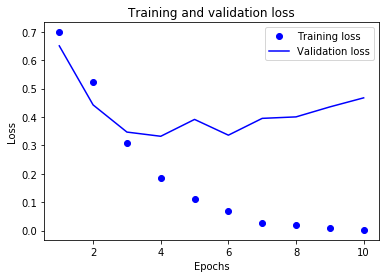

In [175]:
loss = history.history['loss']         # 훈련 손실
val_loss = history.history['val_loss'] # 검증 손실

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      # bo -> 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b -> 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


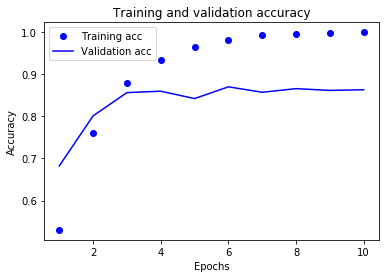

In [176]:
# 그래프 초기화
plt.clf()

acc = history.history['acc']           # 훈련 정확도
val_acc = history.history['val_acc']   # 검증 정확도

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [177]:
# 모델 저장
model.save('./model/movie_review_glove_model.h5')

<br>
<br>

# 테스트셋 확인

In [178]:
# 저장된 모델 파일 로드
model = models.load_model('./model/movie_review_glove_model.h5')

In [179]:
# 테스트셋 평가
results = model.evaluate(x_test, y_test)
results


25000/25000 [==============================] - 1s 43us/step


[0.5081385190946609, 0.8499600291252136]

이전 케라스 내장 데이터셋 모델에서는 정확도가 85%였습니다. 직접 인덱스로 변환했지만 동일한 데이터이기 때문에, 거의 비슷한 수치가 나왔습니다.

<br>
<br>

# GloVe 벡터 로드

In [195]:
glove_dir = './dataset/glove'
embedding_dict = {}

f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")

# 각 라인의 첫 번째는 단어가 오고 그 다음은 100차원 벡터
# 모든 라인을 반복하여 단어와 벡터의 딕셔너리 생성
for line in f:
    data = line.split()
    word = data[0]
    vector = np.asarray(data[1:], dtype='float32')
    embedding_dict[word] = vector
    
f.close()

GloVe는 Word2vec과 비슷한 워드 임베딩 방법입니다. 아래 사이트에서 가장 작은 모델을 받아, 100차원의 임베딩을 사용하겠습니다.

https://nlp.stanford.edu/projects/glove/
<br>
<br>
<br>

'glove.6B.100d.txt' 파일을 열어보면, 아래와 같이 각 단어와 그 벡터가 나열되어 있습니다.

the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062
<br>
<br>
<br>

In [181]:
# 임베딩의 개수
len(embedding_dict)


400000

In [182]:
# 임베딩 출력
embedding_dict


, -2.4941e-01, -2.4119e-01, -7.7925e-02, -1.3214e-01,
         8.8890e-02, -3.5322e-01, -4.9946e-01, -2.6178e-01,  6.8265e-01,
        -5.5880e-02, -3.5552e-01,  7.3410e-01, -1.9281e-01,  6.2913e-02,
        -3.0963e-01,  6.1763e-03, -5.5294e-01, -5.5308e-01, -4.8019e-02,
        -5.2233e-01,  1.6757e-01, -2.3901e-01,  4.1371e-01, -1.1329e-01,
         1.9232e-02,  8.2783e-01, -8.6869e-01,  2.5560e-01,  6.2539e-01,
         2.9376e-01, -1.1674e-02, -5.1310e-01,  9.8754e-02,  1.4037e-01,
        -1.6170e-01,  2.5598e-01,  7.0238e-01, -5.1278e-01,  3.8564e-01,
        -6.6717e-01,  2.4125e-01, -3.5833e-01,  1.2596e-03,  2.4325e-01,
        -3.7836e-01, -3.7128e-01, -3.1183e-02, -1.6111e-01, -6.3181e-01,
         9.2029e-01,  2.1157e-01,  4.3171e-01,  4.3980e-01,  3.7074e-01,
        -1.6915e+00, -8.3494e-01, -3.1641e-02,  6.4735e-01,  6.5229e-01,
        -6.7134e-01,  8.8217e-01,  1.6590e-01, -4.0088e-01,  7.6619e-01,
        -2.3686e-01,  6.3387e-01,  7.1081e-02,  9.1619e-01,  2.2408e-0

In [201]:
# 임베딩 매트릭스 초기화
embedding_matrix = np.zeros((max_words, embedding_dim))

# GloVe 벡터에서 우리가 만든 토큰의 단어들만 추출
for word, i in word_index.items(): # items()함수는 key,value 모두 반환해준다
    embedding_vector = embedding_dict.get(word)
    
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.13787   , -0.17727   , -0.62436002, ...,  0.35506001,
         0.33443999,  0.14436001],
       [-0.88968998,  0.55208999, -0.50498998, ..., -0.54351002,
        -0.21874   ,  0.51186001],
       [-0.17381001, -0.037609  ,  0.068837  , ..., -0.097167  ,
         1.08840001,  0.22676   ]])

GloVe는 전체 400000개의 단어가 있습니다. 그중에서 우리가 토큰으로 생성한 10000개의 벡터만 추출하여 임베딩 매트릭스를 만듭니다.
<br>
<br>
<br>

In [197]:
# 임베딩 매트릭스 크기
embedding_matrix.shape

(10000, 100)

In [185]:
# 마지막 임베딩 매트릭스 출력
embedding_matrix[9999]


array([-0.17381001, -0.037609  ,  0.068837  , -1.04799998,  0.81278002,
        0.26355001,  0.41485   ,  0.018956  , -0.40834999,  0.31979999,
       -0.07748   , -0.27023   ,  1.21099997, -0.101     ,  0.16656999,
        0.56098998,  1.14040005,  0.25082999,  0.36381999, -0.70122999,
       -0.97337002, -0.2264    , -0.30101001,  0.43255001,  0.43430999,
        0.38058999,  0.062135  ,  0.17827   , -0.36430001, -0.78675002,
        0.84675002,  1.12370002, -0.37193999,  0.36816999,  0.057344  ,
       -0.013778  , -0.34051999, -0.50598001, -0.31538001, -0.18312   ,
        1.01400006, -0.42223001,  0.10368   ,  0.25560001, -0.25810999,
        0.29519001, -0.29216999,  0.43917999, -0.36399999, -0.74561   ,
       -0.094103  ,  0.50668001, -0.047155  ,  1.07140005, -0.28018999,
       -1.69490004, -0.38648999,  0.32921001,  0.76716   , -0.30908   ,
       -0.12284   ,  0.82014   ,  0.043673  ,  0.26510999,  0.60667002,
       -0.27529001, -0.61680001,  0.062825  ,  0.013927  ,  0.04

<br>
<br>

# 모델 생성

In [186]:
def build_model():

    model = models.Sequential()
    model.add(layers.Embedding(max_words, embedding_dim, input_length=max_sequences))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, activation='relu'))    
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))

    # 첫 번째 레이어인 임베딩을 GloVe 벡터로 초기화
    model.layers[0].set_weights([embedding_matrix])
    
    # 임베딩 레이어가 훈련이 되지 않도록 고정
    model.layers[0].trainable = False
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])    

    return model

<br>
<br>

# 훈련 및 평가

In [187]:
# 모델 생성
model = build_model()

# 훈련 시작
history = model.fit(x_train_new,
                    y_train_new,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/50
15000/15000 [==============================] - 0s 32us/step - loss: 1.1495 - acc: 0.5348 - val_loss: 0.6682 - val_acc: 0.6017
Epoch 2/50
15000/15000 [==============================] - 0s 22us/step - loss: 0.6883 - acc: 0.5681 - val_loss: 0.6715 - val_acc: 0.5754
Epoch 3/50
15000/15000 [==============================] - 0s 22us/step - loss: 0.6705 - acc: 0.5931 - val_loss: 0.6259 - val_acc: 0.6599
Epoch 4/50
15000/15000 [==============================] - 0s 22us/step - loss: 0.6498 - acc: 0.6259 - val_loss: 0.6463 - val_acc: 0.5854
Epoch 5/50
15000/15000 [==============================] - 0s 22us/step - loss: 0.6256 - acc: 0.6488 - val_loss: 0.5941 - val_acc: 0.6861
Epoch 6/50
15000/15000 [==============================] - 0s 22us/step - loss: 0.6308 - acc: 0.6683 - val_loss: 0.6538 - val_acc: 0.6160
Epoch 7/50
15000/15000 [==============================] - 0s 22us/step - loss: 0.5819 - acc: 0.6983 - val_loss: 0.5787 - val_acc

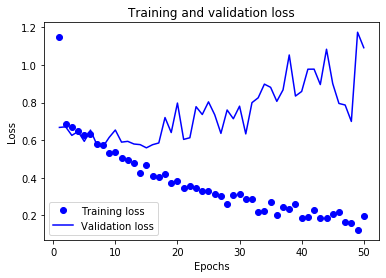

In [188]:
loss = history.history['loss']         # 훈련 손실
val_loss = history.history['val_loss'] # 검증 손실

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      # bo -> 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b -> 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


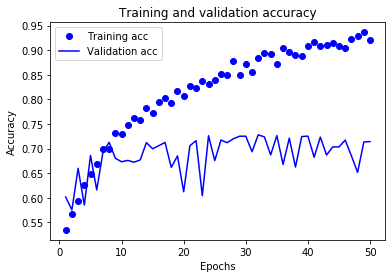

In [189]:
# 그래프 초기화
plt.clf()

acc = history.history['acc']           # 훈련 정확도
val_acc = history.history['val_acc']   # 검증 정확도

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [190]:
# 모델 저장
model.save('./model/movie_review_glove2_model.h5')

<br>
<br>

# 테스트셋 확인

In [191]:
# 저장된 모델 파일 로드
model = models.load_model('./model/movie_review_glove2_model.h5')

In [192]:
# 테스트셋 평가
results = model.evaluate(x_test, y_test)
results


25000/25000 [==============================] - 1s 48us/step


[1.1245276201598347, 0.7064800262451172]

임베딩을 자체적으로 학습했을 때는 84%의 정확도였습니다. 하지만 GloVe로 초기화를 하니 오히려 71%로 수치가 떨어졌습니다. 이는 임베딩 학습시에는 훈련 데이터에 딱 맞게 벡터값이 설정되었기 때문입니다. 

반면에 워드 임베딩을 사용해서 고정하면 임베딩 층은 훈련 데이터와 연관성이 사라집니다. 그래서 나머지 층을 이전보다 파라미터의 수를 늘려 학습을 위한 정보량을 증가시켰습니다. 하지만 훈련 데이터가 15000개로 상대적으로 적어서 과대적합이 일어났습니다. 워드 임베딩을 효과적으로 쓰기 위해서는 훈련에 필요한 데이터의 수가 충분히 커야 합니다.